## Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Data loading 

In [2]:
# Load the CIFAR-10 dataset (10 classes of images)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data (scale between 0 and 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

## CNN Model

In [3]:
model = Sequential([
    # Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # MaxPooling layer with 2x2 pool size
    MaxPooling2D(pool_size=(2, 2)),
    
    # Second convolutional layer with 64 filters
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Third convolutional layer with 128 filters
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the feature maps to a 1D vector for input to the fully connected layer
    Flatten(),
    
    # Fully connected layer with 128 neurons
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    
    # Output layer with 10 neurons for 10 classes, softmax activation
    Dense(10, activation='softmax')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile Model

In [4]:
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## train model

In [5]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2851 - loss: 1.9115 - val_accuracy: 0.5229 - val_loss: 1.3260
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5138 - loss: 1.3496 - val_accuracy: 0.5942 - val_loss: 1.1399
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5900 - loss: 1.1632 - val_accuracy: 0.6483 - val_loss: 1.0062
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.6291 - loss: 1.0525 - val_accuracy: 0.6330 - val_loss: 1.0342
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6637 - loss: 0.9661 - val_accuracy: 0.6883 - val_loss: 0.8934
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6892 - loss: 0.8932 - val_accuracy: 0.6945 - val_loss: 0.8757
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.7122 - loss: 0.8274 - val_accuracy: 0.6927 - val_loss: 0.8716
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7327 - loss: 0.7688 - 

## evaluate model

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7282 - loss: 0.8129
Test accuracy: 0.7243000268936157


## CNN feature map

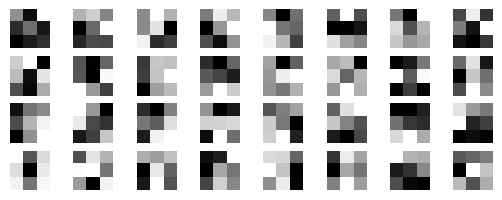

In [7]:
import matplotlib.pyplot as plt

# Get the filters from the first convolutional layer
filters = model.layers[0].get_weights()[0]

# Plot the filters
for i in range(filters.shape[3]):
    plt.subplot(8, 8, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()